In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import os
output_dir = "/content/plots"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_path = fr'/content/drive/MyDrive/FD001/'

index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1, 22)]
col_names = index_names + setting_names + sensor_names

In [ ]:
train = pd.read_csv((dir_path + 'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path + 'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path + 'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [ ]:
print(train.head(5))

   unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  

In [ ]:
# Save the DataFrames as CSV files
train.to_csv(dir_path + 'train_FD001.csv', index=False)
test.to_csv(dir_path + 'test_FD001.csv', index=False)
y_test.to_csv(dir_path + 'RUL_FD001.csv', index=False)

print("CSV files saved successfully.")

CSV files saved successfully.


In [ ]:
train[index_names].describe()

,unit_nr,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [ ]:
train[index_names].groupby('unit_nr').max().describe()

,time_cycles
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


In [ ]:
train[setting_names].describe()

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [ ]:
train[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


In [ ]:
def add_remaining_useful_life(df):
  grouped_by_unit = df.groupby(by='unit_nr')
  max_cycle = grouped_by_unit['time_cycles'].max()

  result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

  remaining_useful_life = result_frame['max_cycle'] - result_frame['time_cycles']
  result_frame['RUL'] = remaining_useful_life

  result_frame = result_frame.drop('max_cycle', axis=1)
  return result_frame

train = add_remaining_useful_life(train)
train[index_names + ['RUL']].head(5)

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


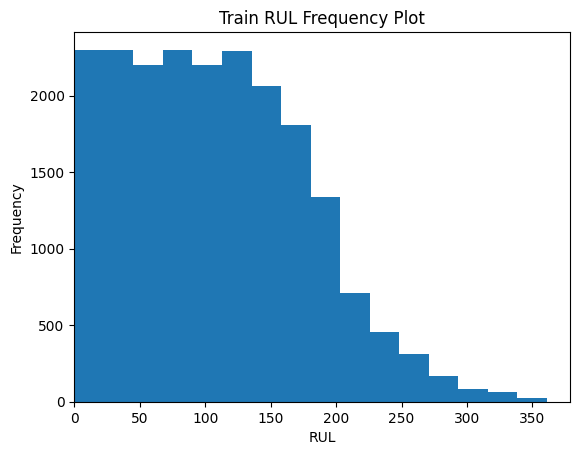

In [ ]:
plt.hist(train['RUL'], bins=16)
plt.title("Train RUL Frequency Plot")
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.xlim(0)
plt.show()

In [ ]:
print(train['unit_nr'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [ ]:
def plot_sensor(sensor_name):
  plt.figure(figsize=(13, 5))
  for i in train['unit_nr'].unique():
    if (i % 10 == 0):
      plt.plot('RUL', sensor_name, data=train[train['unit_nr'] == i])

  plt.xlim(250, 0)
  plt.xticks(np.arange(0, 275, 25))
  plt.ylabel(sensor_name)
  plt.xlabel('Remaning Useful Life')
  plt.show()

In [ ]:
for sensor_name in sensor_names:
  plot_sensor(sensor_name)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import matplotlib.pyplot as plt
from google.colab import files

# Create a directory for saving plots
output_dir = "sensor_plots_for_Part_1_FD001"
os.makedirs(output_dir, exist_ok=True)

def plot_sensor(sensor_name):
  plt.figure(figsize=(10, 6))
  for i in train['unit_nr'].unique():
    if (i % 10 == 0):
      plt.plot('RUL', sensor_name, data=train[train['unit_nr'] == i])

  plt.xlim(250, 0)
  plt.xticks(np.arange(0, 275, 25))
  plt.ylabel(sensor_name)
  plt.xlabel('Remaning Useful Life')
  # plt.show()

  save_path = os.path.join(output_dir, f"{sensor_name}.png")
  plt.savefig(save_path, dpi=300)
  plt.close()

# Plot and save images for all sensors
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

!zip -r sensor_plots_for_Part_1_FD001.zip sensor_plots_for_Part_1_FD001
files.download("sensor_plots_for_Part_1_FD001.zip")

  adding: sensor_plots_for_Part_1_FD001/ (stored 0%)
  adding: sensor_plots_for_Part_1_FD001/s_12.png (deflated 4%)
  adding: sensor_plots_for_Part_1_FD001/s_2.png (deflated 4%)
  adding: sensor_plots_for_Part_1_FD001/s_4.png (deflated 4%)
  adding: sensor_plots_for_Part_1_FD001/s_6.png (deflated 12%)
  adding: sensor_plots_for_Part_1_FD001/s_11.png (deflated 4%)
  adding: sensor_plots_for_Part_1_FD001/s_17.png (deflated 5%)
  adding: sensor_plots_for_Part_1_FD001/s_10.png (deflated 44%)
  adding: sensor_plots_for_Part_1_FD001/s_13.png (deflated 4%)
  adding: sensor_plots_for_Part_1_FD001/s_7.png (deflated 4%)
  adding: sensor_plots_for_Part_1_FD001/s_1.png (deflated 45%)
  adding: sensor_plots_for_Part_1_FD001/s_15.png (deflated 4%)
  adding: sensor_plots_for_Part_1_FD001/s_8.png (deflated 4%)
  adding: sensor_plots_for_Part_1_FD001/s_19.png (deflated 45%)
  adding: sensor_plots_for_Part_1_FD001/s_5.png (deflated 43%)
  adding: sensor_plots_for_Part_1_FD001/s_9.png (deflated 5%)
  add

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def evaluate(y_true, y_hat, label='test'):
  mse = mean_squared_error(y_true, y_hat)
  rmse = np.sqrt(mse)
  variance = r2_score(y_true, y_hat)
  print('{} set RMSE: {}'.format(label, rmse, variance))

In [ ]:
drop_sensors = ['s_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
drop_labels = index_names + setting_names + drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE: 44.66819159545429
test set RMSE: 31.952633027738514


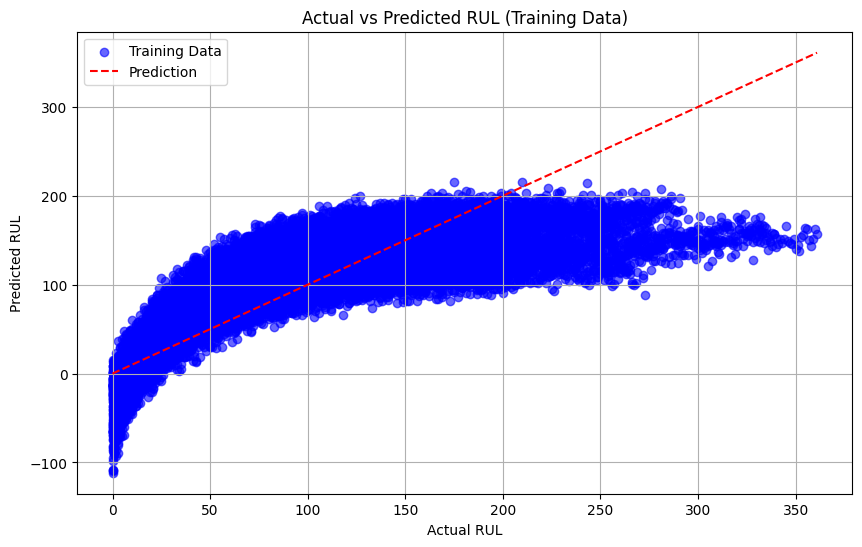

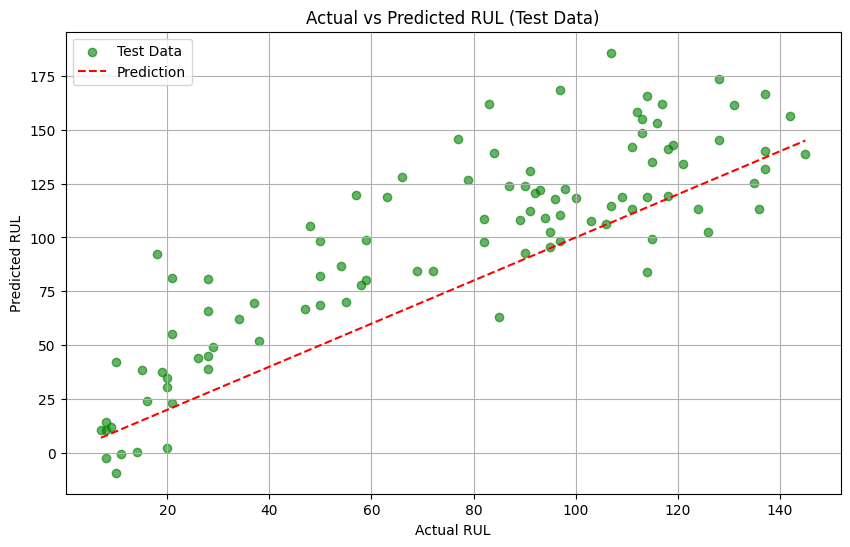

In [ ]:
# Scatter plot of actual vs predicted RUL for the training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_hat_train, alpha=0.6, color='blue', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Prediction')
plt.title('Actual vs Predicted RUL (Training Data)')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of actual vs predicted RUL for the test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test, alpha=0.6, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Prediction')
plt.title('Actual vs Predicted RUL (Test Data)')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_train_clipped = y_train.clip(upper=125)

In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train_clipped)
y_hat_train = svr.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')
y_hat_test = svr.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE: 29.57783070266026
test set RMSE: 29.675150117440094


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_clipped)

y_hat_train = svr.predict(X_train_scaled)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_scaled)
evaluate(y_test, y_hat_test)

train set RMSE: 21.578263975067888
test set RMSE: 21.580480163289597


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

X_train_transformed = poly.fit_transform(X_train_scaled)
X_test_transformed = poly.fit_transform(X_test_scaled)

print(X_train_scaled.shape)
print(X_train_transformed.shape)

(20631, 14)
(20631, 120)


In [ ]:
svr_f = SVR(kernel='linear')
svr_f.fit(X_train_transformed, y_train_clipped)

y_hat_train = svr_f.predict(X_train_transformed)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr_f.predict(X_test_transformed)
evaluate(y_test, y_hat_test)

train set RMSE: 19.716789731130877
test set RMSE: 20.58540250837201


In [ ]:
from sklearn.feature_selection import SelectFromModel

select_features = SelectFromModel(svr_f, threshold='mean', prefit=True)
select_features.get_support()
# feature_names = poly.get_feature_names()

# print('Original Features:', X_train.columns)
# print("Best Features:", np.array(feature_names)[select_features.get_support()])
# np.array(feature_names)[select_features.get_support()].shape

array([False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

train set RMSE: 19.74678910148113
test set RMSE: 20.55613819605452


In [ ]:
epsilon = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]

for e in epsilon:
    svr = SVR(kernel='linear', epsilon=e)
    svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

    # predict and evaluate
    y_hat = svr.predict(X_train_transformed[:, select_features.get_support()])
    mse = mean_squared_error(y_train_clipped, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_train_clipped, y_hat)
    print("epsilon:", e, "RMSE:", rmse, "R2:", variance)

epsilon: 0.6 RMSE: 19.747379032162783 R2: 0.7754485430737796
epsilon: 0.5 RMSE: 19.747563084712564 R2: 0.7754443572564377
epsilon: 0.4 RMSE: 19.74772556660335 R2: 0.7754406619776464
epsilon: 0.3 RMSE: 19.747580761069845 R2: 0.7754439552496148
epsilon: 0.2 RMSE: 19.746600078171717 R2: 0.775466258012399
epsilon: 0.1 RMSE: 19.74678910148113 R2: 0.7754619593165268
epsilon: 0.05 RMSE: 19.74653245698402 R2: 0.7754677958176165


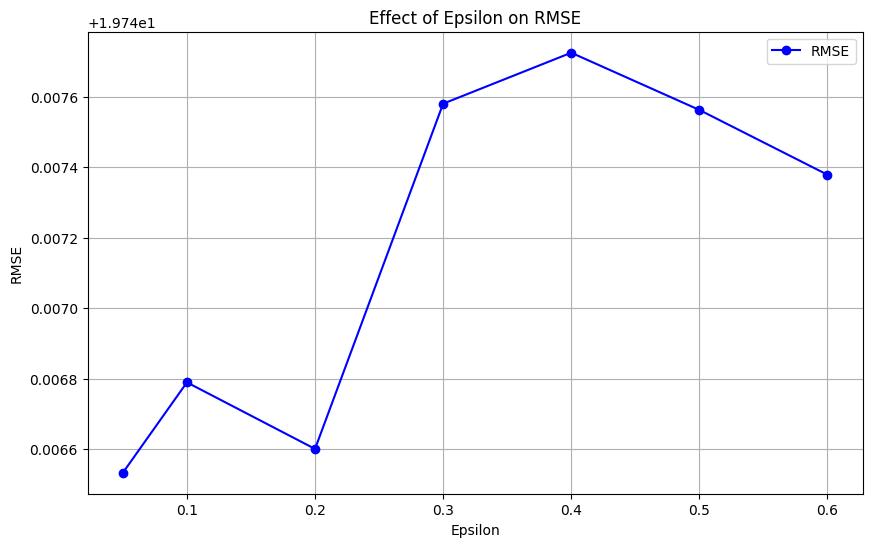

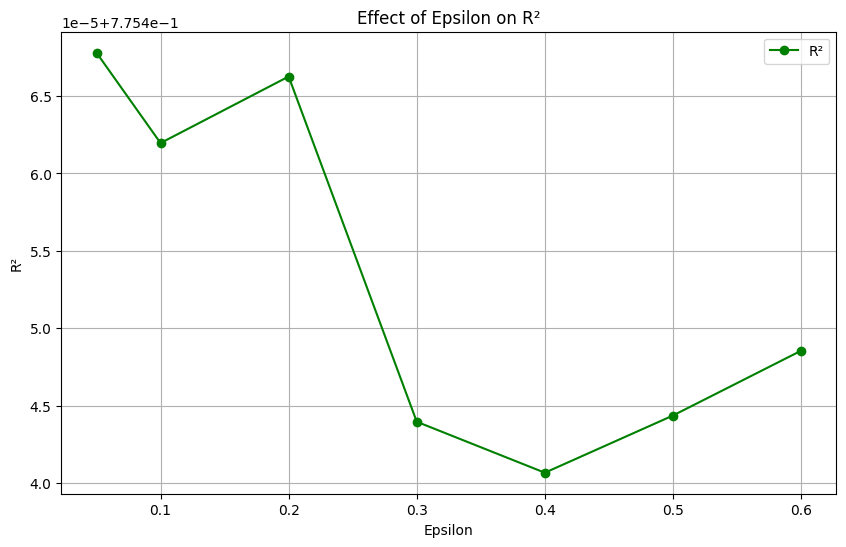

In [ ]:
# Visualize RMSE and R² vs Epsilon
rmse_values = []
r2_values = []

for e in epsilon:
    svr = SVR(kernel='linear', epsilon=e)
    svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

    y_hat = svr.predict(X_train_transformed[:, select_features.get_support()])
    rmse = np.sqrt(mean_squared_error(y_train_clipped, y_hat))
    variance = r2_score(y_train_clipped, y_hat)

    rmse_values.append(rmse)
    r2_values.append(variance)

# Plot RMSE vs Epsilon
plt.figure(figsize=(10, 6))
plt.plot(epsilon, rmse_values, marker='o', label='RMSE', color='blue')
plt.title('Effect of Epsilon on RMSE')
plt.xlabel('Epsilon')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

# Plot R² vs Epsilon
plt.figure(figsize=(10, 6))
plt.plot(epsilon, r2_values, marker='o', label='R²', color='green')
plt.title('Effect of Epsilon on R²')
plt.xlabel('Epsilon')
plt.ylabel('R²')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
svr = SVR(kernel='linear', epsilon=0.2)
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

train set RMSE: 19.746600078171717
test set RMSE: 20.544124820773963


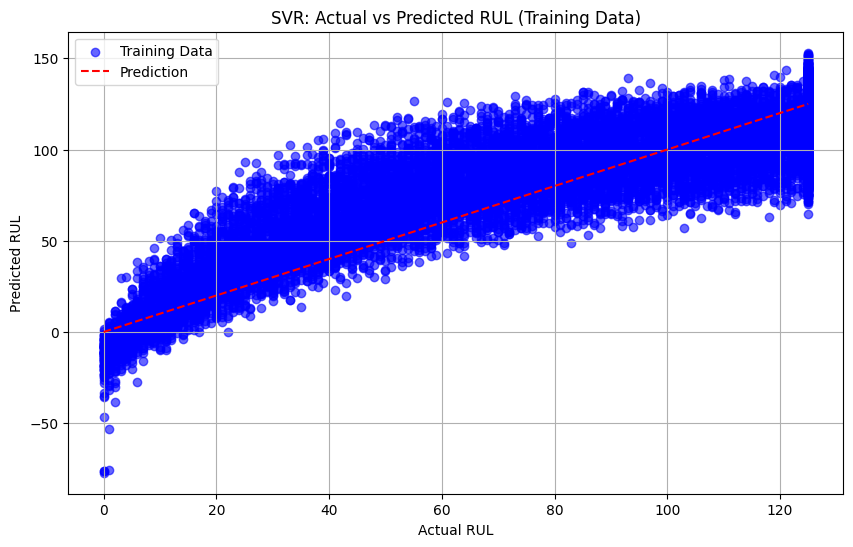

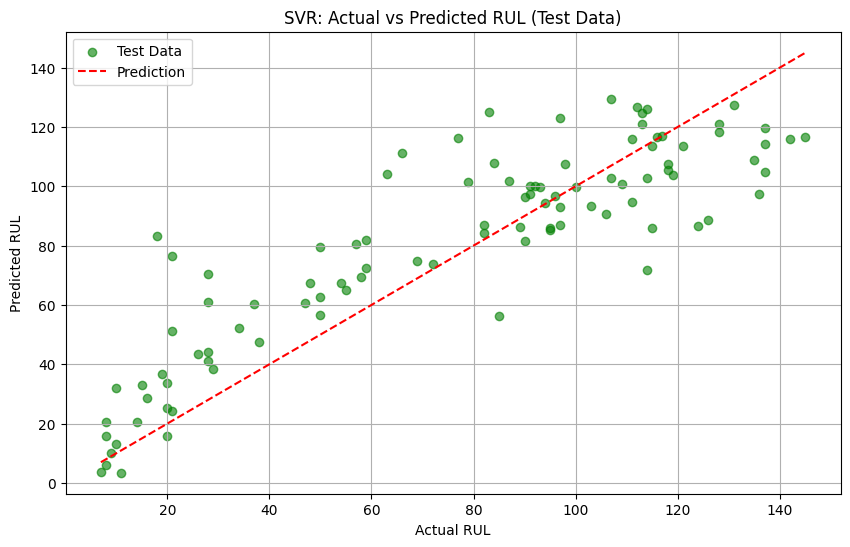

In [ ]:
# Actual vs Predicted for Training Data
plt.figure(figsize=(10, 6))
plt.scatter(y_train_clipped, y_hat_train, alpha=0.6, color='blue', label='Training Data')
plt.plot([y_train_clipped.min(), y_train_clipped.max()], [y_train_clipped.min(), y_train_clipped.max()],
         color='red', linestyle='--', label='Prediction')
plt.title('SVR: Actual vs Predicted RUL (Training Data)')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()

# Actual vs Predicted for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test, alpha=0.6, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Prediction')
plt.title('SVR: Actual vs Predicted RUL (Test Data)')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)


X_test_interim = test.drop(drop_labels, axis=1)

In [ ]:
remaining_sensors = X_train.columns.difference(index_names + ['RUL'])
lag1 = [col + '_lag_1' for col in remaining_sensors]

X_train[lag1] = X_train.groupby('unit_nr')[remaining_sensors].shift(1)
X_train.dropna(inplace=True)

y_train = X_train.pop('RUL')
X_test = X_test_interim.groupby('unit_nr').last().reset_index()

In [ ]:
def evaluate(y_true, y_hat, label='test'):
  mse = mean_squared_error(y_true, y_hat)
  rmse = np.sqrt(mse)
  variance = r2_score(y_true, y_hat)
  print('{} set RMSE: {}, R2: {}'.format(label, rmse, variance))

In [ ]:
lm  = LinearRegression()
lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

# y_hat_test = lm.predict(X_test)
# evaluate(y_test, y_hat_test)

train set RMSE: 39.36769235113511, R2: 0.670992959536232


In [ ]:
def add_lagged_variables(df_input, nr_of_lags, columns):
  df  = df_input.copy()
  for i in range(nr_of_lags):
    lagged_columns = [col + '_lag_{}'.format(i+1) for col in columns]
    df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
  df.dropna(inplace=True)
  return df

In [ ]:
def add_specific_lags(df_input, list_of_lags, columns):
  df = df_input.copy()
  for i in list_of_lags:
    lagged_columns = [col + '_lag_{}'.format(i) for col in columns]
    df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i)
  df.dropna(inplace=True)
  return df

In [ ]:
from statsmodels.tsa.stattools import adfuller

test_series = train.loc[train['unit_nr']==1, 's_7']
adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(test_series, maxlag=1)
print('Single Unit, Single Column Test Results')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}\n'.format(pvalue < 0.05))

Single Unit, Single Column Test Results
adf: -2.2766669279481233 
pvalue: 0.17960380425355071
Significant: False



In [ ]:
test_series = test_series.diff(1).dropna()
adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(test_series, maxlag=1)
print('Single Unit, Single Column Test Results')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}\n'.format(pvalue < 0.05))

Single Unit, Single Column Test Results
adf: -14.824168539718967 
pvalue: 1.9431018596392618e-27
Significant: True



In [ ]:
def find_max_diff(series):
  maxdiff = 0
  do = True
  adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series, maxlag=1)
  if pvalue < 0.05:
    do = False

  while do:
    maxdiff += 1
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series.diff(maxdiff).dropna(), maxlag=1)
    if pvalue < 0.05:
      do = False
  return maxdiff

def make_stationary(df_input, columns):
  df = df_input.copy()
  for unit_nr in range(1, df['unit_nr'].max()+1):
    for col in columns:
      maxdiff = find_max_diff(df.loc[df['unit_nr'] == unit_nr, col])
      if maxdiff > 0:
        df.loc[df['unit_nr'] == unit_nr, col] = df.loc[df['unit_nr'] == unit_nr, col].diff(maxdiff)
  df.dropna(inplace=True)
  return df

In [ ]:
intermediate_df = train.drop(drop_labels, axis=1)
intermediate_df = make_stationary(intermediate_df, remaining_sensors)

intermediate_df.head(5)

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
1,1,2,642.15,1591.82,2.54,-0.61,-0.02,9044.07,0.02,0.62,0.05,-7.13,8.4318,392.0,39.00,23.4236,190
2,1,3,642.35,1587.99,1.06,0.51,0.04,9052.94,-0.22,0.14,-0.04,1.74,8.4178,390.0,38.95,23.3442,189
3,1,4,642.35,1582.79,-2.33,0.19,0.03,9049.48,-0.14,0.44,0.05,0.60,8.3682,392.0,38.88,23.3739,188
4,1,5,642.37,1582.85,4.35,-0.45,-0.05,9055.15,0.15,-0.67,-0.04,-0.03,8.4294,393.0,38.90,23.4044,187
5,1,6,642.10,1584.47,-7.85,0.67,-0.04,9049.68,-0.12,-0.51,-0.01,-0.95,8.4108,391.0,38.98,23.3669,186


In [ ]:
lm = LinearRegression()
lm.fit(intermediate_df[remaining_sensors], intermediate_df['RUL'])

y_hat_train = lm.predict(intermediate_df[remaining_sensors])
evaluate(intermediate_df['RUL'], y_hat_train, 'train')

train set RMSE: 51.6337561379118, R2: 0.4340864011385229


In [ ]:
import statsmodels.api as sm
metrics = pd.DataFrame(columns = ['rmse', 'AIC', 'BIC'])
nr_of_lags = 30
for i in range(0, nr_of_lags + 1):
  X_train = add_lagged_variables(intermediate_df, i, remaining_sensors)
  X_train = X_train.drop(index_names, axis=1)
  y_train = X_train.pop('RUL')

  model = sm.OLS(y_train, sm.add_constant(X_train.values))
  result = model.fit()
  # Replace .append with pd.concat
  metrics = pd.concat([metrics, pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic, 2), round(result.bic, 2)]], columns=['rmse', 'AIC', 'BIC'])], ignore_index=True)

display(metrics)

,rmse,AIC,BIC
0,51.652627,220271.65,220390.59
1,46.060503,214530.30,214760.12
2,43.058562,210753.82,211094.38
3,41.151503,207898.35,208349.51
4,39.833453,205574.27,206135.89
5,38.813294,203528.00,204199.94
6,37.986450,201667.95,202450.06
7,37.304649,199952.23,200844.37
8,36.723366,198338.72,199340.76
9,36.198014,196782.37,197894.15


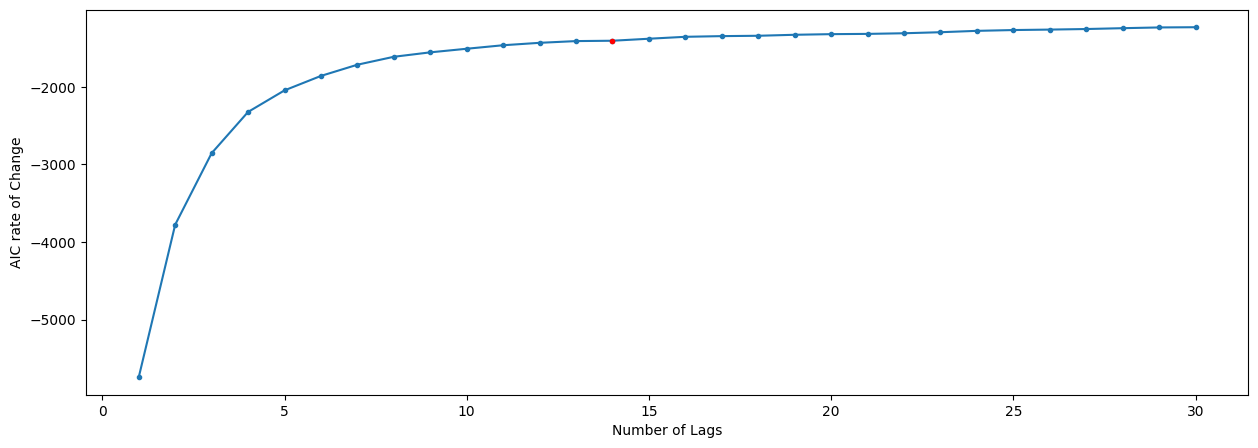

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(metrics['AIC'].diff(), marker='.')
plt.plot(14, metrics['AIC'].diff()[14], '.r')
plt.xlabel("Number of Lags")
plt.ylabel("AIC rate of Change")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
X_train = X_train.drop(index_names, axis=1)

vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}

display(vifs)

{'s_2': 4081069.37,
 's_3': 148827.31,
 's_4': 34450.38,
 's_7': 676636.48,
 's_8': 2591641803.36,
 's_9': 1580259.79,
 's_11': 28779.21,
 's_12': 686940.38,
 's_13': 2480791096.44,
 's_14': 1724157.4,
 's_15': 116497.33,
 's_17': 152527.42,
 's_20': 113760.29,
 's_21': 119734.69,
 'RUL': 5.11,
 's_11_lag_1': 36657.17,
 's_12_lag_1': 785930.67,
 's_13_lag_1': 2613853860.37,
 's_14_lag_1': 1926076.65,
 's_15_lag_1': 116696.91,
 's_17_lag_1': 152525.25,
 's_2_lag_1': 4074895.76,
 's_20_lag_1': 113444.5,
 's_21_lag_1': 119475.96,
 's_3_lag_1': 148979.81,
 's_4_lag_1': 38889.32,
 's_7_lag_1': 733701.46,
 's_8_lag_1': 2748462855.3,
 's_9_lag_1': 1716566.66,
 's_11_lag_2': 37805.01,
 's_12_lag_2': 780833.03,
 's_13_lag_2': 2620758747.64,
 's_14_lag_2': 1917277.53,
 's_15_lag_2': 116346.14,
 's_17_lag_2': 152686.28,
 's_2_lag_2': 4072573.42,
 's_20_lag_2': 113685.05,
 's_21_lag_2': 119653.41,
 's_3_lag_2': 149009.07,
 's_4_lag_2': 38847.79,
 's_7_lag_2': 730031.66,
 's_8_lag_2': 2753903979.86

In [ ]:
from sklearn.preprocessing import StandardScaler

intermediate_df = train.drop(drop_labels, axis=1)
scaler = StandardScaler()
scaler.fit(intermediate_df[remaining_sensors])
intermediate_df[remaining_sensors] = scaler.transform(intermediate_df[remaining_sensors])

intermediate_df = make_stationary(intermediate_df, remaining_sensors)

X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
X_train = X_train.drop(index_names, axis=1)

vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}
display(vifs)

{'s_2': 2.58,
 's_3': 2.31,
 's_4': 2.09,
 's_7': 2.21,
 's_8': 2.39,
 's_9': 4.15,
 's_11': 1.9,
 's_12': 1.97,
 's_13': 2.37,
 's_14': 4.75,
 's_15': 2.55,
 's_17': 2.47,
 's_20': 2.64,
 's_21': 2.72,
 'RUL': 2.34,
 's_11_lag_1': 2.39,
 's_12_lag_1': 2.22,
 's_13_lag_1': 2.47,
 's_14_lag_1': 5.27,
 's_15_lag_1': 2.51,
 's_17_lag_1': 2.42,
 's_2_lag_1': 2.54,
 's_20_lag_1': 2.59,
 's_21_lag_1': 2.67,
 's_3_lag_1': 2.27,
 's_4_lag_1': 2.32,
 's_7_lag_1': 2.36,
 's_8_lag_1': 2.51,
 's_9_lag_1': 4.48,
 's_11_lag_2': 2.42,
 's_12_lag_2': 2.18,
 's_13_lag_2': 2.45,
 's_14_lag_2': 5.22,
 's_15_lag_2': 2.47,
 's_17_lag_2': 2.39,
 's_2_lag_2': 2.49,
 's_20_lag_2': 2.55,
 's_21_lag_2': 2.63,
 's_3_lag_2': 2.24,
 's_4_lag_2': 2.29,
 's_7_lag_2': 2.31,
 's_8_lag_2': 2.48,
 's_9_lag_2': 4.42,
 's_11_lag_3': 2.35,
 's_12_lag_3': 2.13,
 's_13_lag_3': 2.42,
 's_14_lag_3': 5.14,
 's_15_lag_3': 2.43,
 's_17_lag_3': 2.35,
 's_2_lag_3': 2.45,
 's_20_lag_3': 2.53,
 's_21_lag_3': 2.59,
 's_3_lag_3': 2.2,


In [ ]:
import statsmodels.api as sm
metrics = pd.DataFrame(columns = ['rmse', 'AIC', 'BIC'])
nr_of_lags = 30
for i in range(0, nr_of_lags + 1):
  X_train = add_lagged_variables(intermediate_df, i, remaining_sensors)
  X_train = X_train.drop(index_names, axis=1)
  y_train = X_train.pop('RUL')

  model = sm.OLS(y_train, sm.add_constant(X_train.values))
  result = model.fit()
  # Replace .append with pd.concat
  metrics = pd.concat([metrics, pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic, 2), round(result.bic, 2)]], columns=['rmse', 'AIC', 'BIC'])], ignore_index=True)

display(metrics)

,rmse,AIC,BIC
0,45.311459,214892.78,215011.72
1,43.199826,211909.99,212139.82
2,42.321539,210051.72,210392.28
3,41.806392,208537.26,208988.42
4,41.449199,207175.30,207736.92
5,41.159315,205879.37,206551.31
6,40.908577,204622.43,205404.54
7,40.677353,203385.46,204277.60
8,40.459553,202162.57,203164.60
9,40.246294,200945.11,202056.89


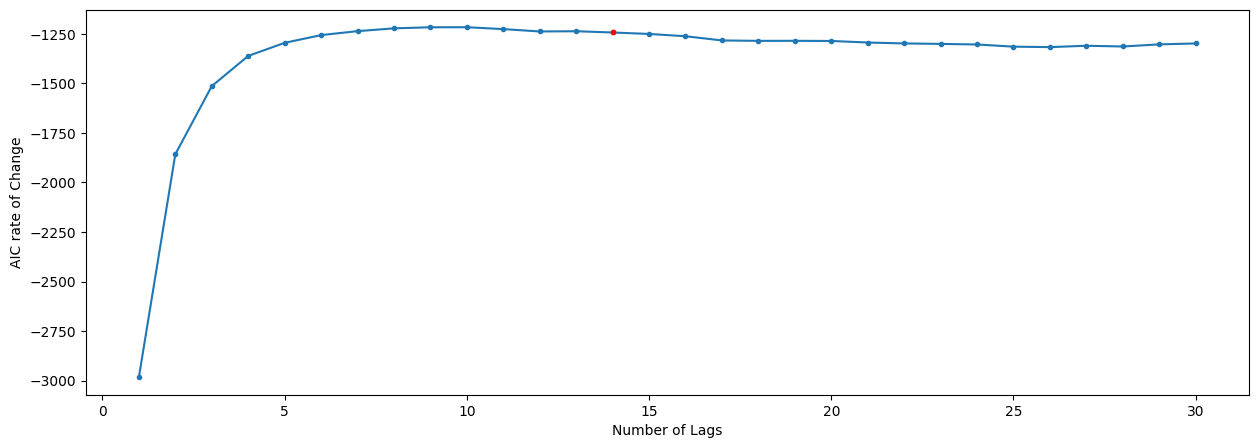

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(metrics['AIC'].diff(), marker='.')
plt.plot(14, metrics['AIC'].diff()[14], '.r')
plt.xlabel("Number of Lags")
plt.ylabel("AIC rate of Change")
plt.show()

In [ ]:
lags = 9

# prep data
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_lagged_variables(X_train_interim, lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_lagged_variables(X_test_interim, lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)

# fit model
model = sm.OLS(y_train.clip(upper=125), X_train)  # apply clipped RUL from last post
model_fitted = model.fit()

# predict
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)

# evaluate
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

train set RMSE: 20.80233928213837, R2: 0.7523208224684111
test set RMSE: 21.148958570124023, R2: 0.7409888687595043


In [ ]:
specific_lags = [1,2,3,4,5,10,20]

# prep data
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_specific_lags(X_train_interim, specific_lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_specific_lags(X_test_interim, specific_lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)

# fit model
model = sm.OLS(y_train.clip(upper=125), X_train)
model_fitted = model.fit()

# predict
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)

# evaluate
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

train set RMSE: 20.742950740267165, R2: 0.7542608298904978
test set RMSE: 20.85223486440749, R2: 0.7482058292992063


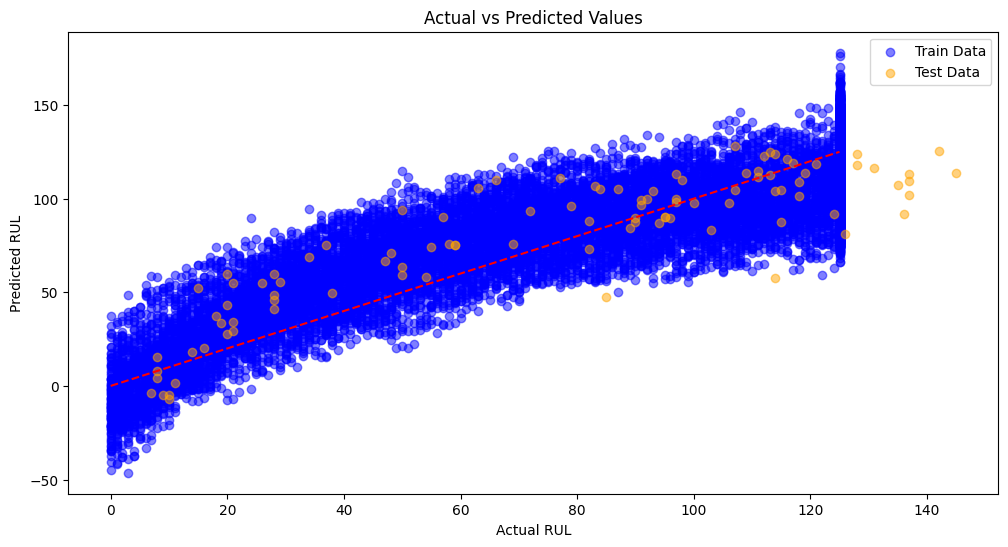

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_train.clip(upper=125), y_hat_train, label="Train Data", alpha=0.5, color="blue")
plt.scatter(y_test, y_hat, label="Test Data", alpha=0.5, color="orange")
plt.plot([0, 125], [0, 125], color="red", linestyle="--")
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
